In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('classicalHighingData.csv')
chessdata['Opening_new'].describe()


count                 6379
unique                  88
top       Sicilian Defense
freq                  1269
Name: Opening_new, dtype: object

In [28]:
chessdata['Result'].describe()

count     6379
unique       4
top        1-0
freq      3186
Name: Result, dtype: object

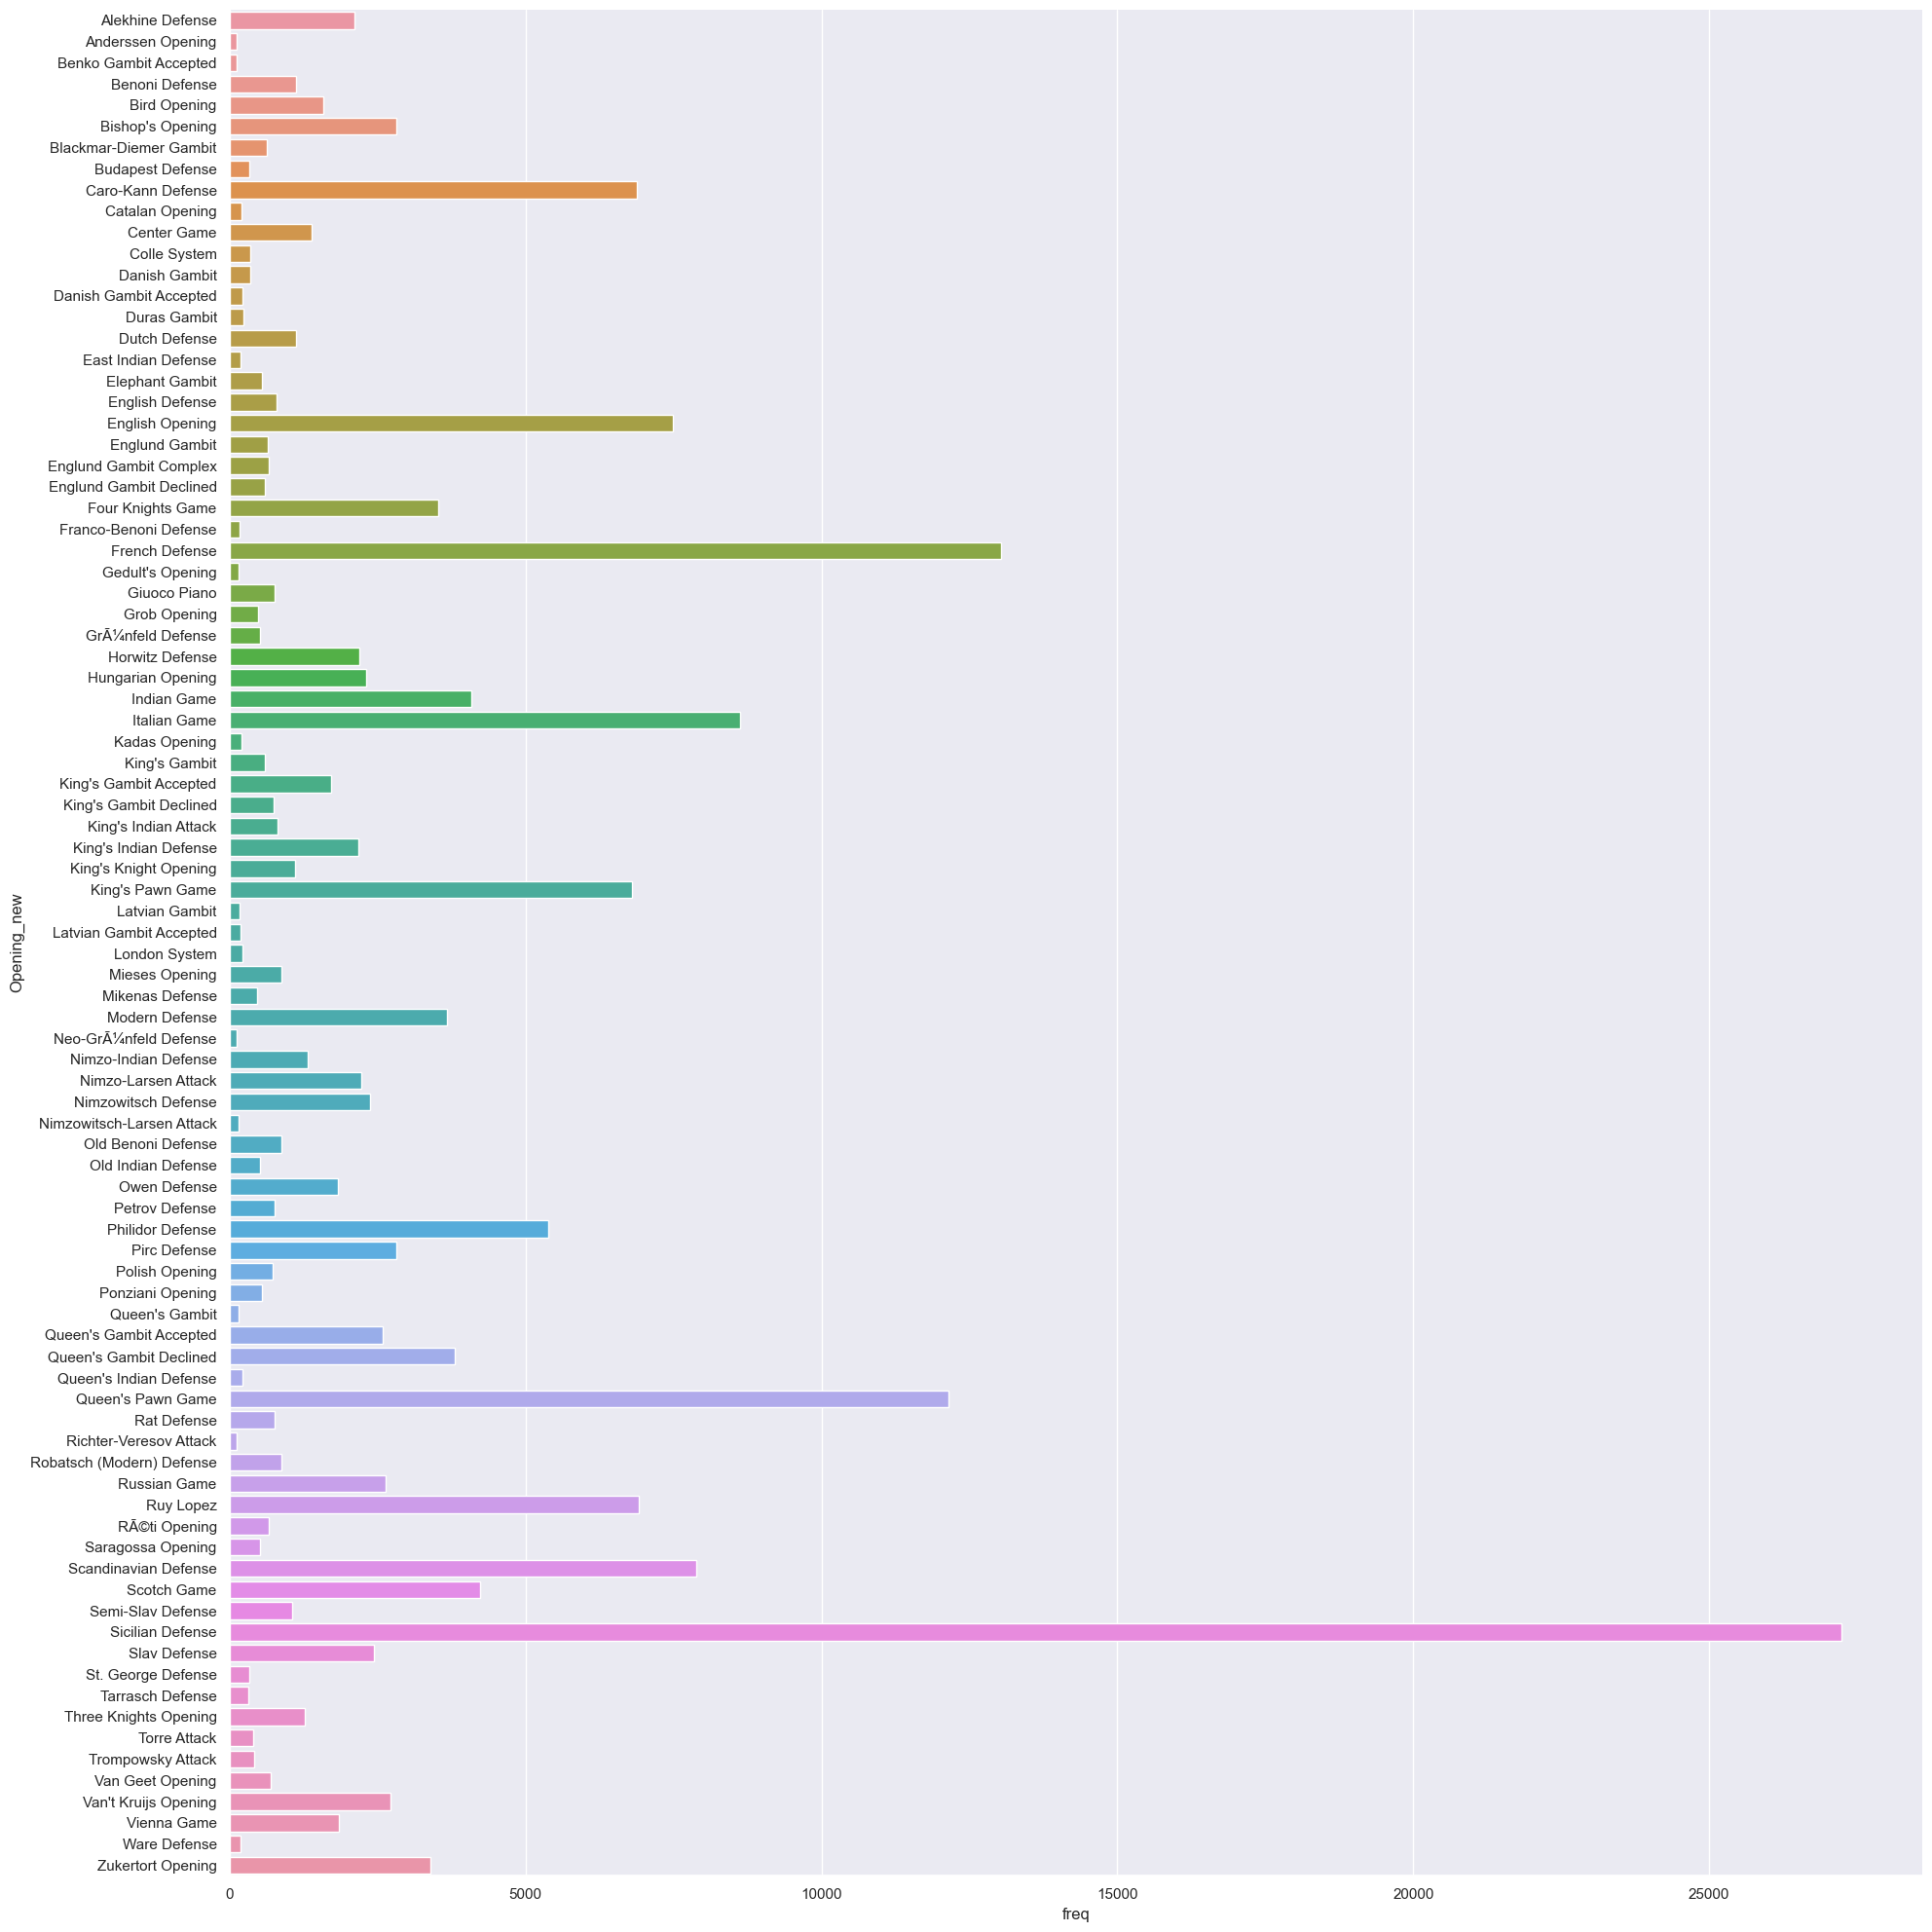

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [21]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
freq_gen

,Unnamed: 0,BlackElo,ECO,Event,Opening,Result,Termination,TimeControl,WhiteElo,BlackTitle,WhiteTitle,Move_ply_200,Category,Opening_new,freq,ELO Diff,Ave ELO,tot
0,40,1826,C53,Rated Classical game,Italian Game: Classical Variation #2,1-0,Normal,900+15,2168,NaN,NaN,NaN,Classical,Italian Game,8617,342,1997.0,323
1,47,1807,A11,Rated Classical game,English Opening: Caro-Kann Defensive System,1/2-1/2,Normal,900+15,1770,NaN,NaN,NaN,Classical,English Opening,7494,-37,1788.5,320
2,55,1692,B21,Rated Classical game,Sicilian Defense: Smith-Morra Gambit,1/2-1/2,Normal,900+15,1939,NaN,NaN,NaN,Classical,Sicilian Defense,27238,247,1815.5,1269
3,113,1688,C02,Rated Classical game,French Defense: Advance Variation #2,0-1,Normal,1800+0,1760,NaN,NaN,NaN,Classical,French Defense,13036,72,1724.0,473
4,150,1786,C20,Rated Classical game,King's Pawn Game: Leonardis Variation,0-1,Normal,900+15,1854,NaN,NaN,NaN,Classical,King's Pawn Game,6903,68,1820.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374,197669,1727,C67,Rated Classical game,"Ruy Lopez: Berlin Defense, Rio Gambit Accepted",1-0,Normal,900+15,1810,NaN,NaN,NaN,Classical,Ruy Lopez,6912,83,1768.5,308
6375,197689,1777,C02,Rated Classical game,"French Defense: Advance Variation, Paulsen Attack",0-1,Normal,900+15,1648,NaN,NaN,NaN,Classical,French Defense,13036,-129,1712.5,473
6376,197713,1912,B12,Rated Classical game,"Caro-Kann Defense: Advance Variation, Prins At...",0-1,Time forfeit,900+15,1922,NaN,NaN,NaN,Classical,Caro-Kann Defense,6878,10,1917.0,270
6377,197729,1710,B22,Rated Classical game,"Sicilian Defense: Alapin Variation, Smith-Morr...",1-0,Normal,900+15,1703,NaN,NaN,NaN,Classical,Sicilian Defense,27238,-7,1706.5,1269


In [30]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]
temp = temp[temp.Result != '*']


#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0

# temp['Result']

temp['win'] = temp.groupby(['Opening_new'])['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


,Opening_new,tot,win,win_rate
6312,Ware Defense,1,0,0.0
4803,Kadas Opening,1,0,0.0
304,Mieses Opening,3,0,0.0
1025,East Indian Defense,4,0,0.0
556,Ponziani Opening,8,1,0.125
...,...,...,...,...
1830,Polish Opening,12,9,0.75
2482,Franco-Benoni Defense,4,3,0.75
239,Nimzowitsch-Larsen Attack,10,8,0.8
4649,Queen's Gambit,1,1,1.0


Win rate for white

In [ ]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
75,Mieses Opening,135,54,0.4
8,Italian Game,157,66,0.420382
252,Semi-Slav Defense,101,45,0.445545
70,Van't Kruijs Opening,235,105,0.446809
128,Vienna Game,104,49,0.471154
34,Nimzo-Larsen Attack,321,153,0.476636
64,Old Benoni Defense,144,69,0.479167
41,Queen's Pawn Game,654,318,0.486239
4,French Defense,777,381,0.490347
10,Scandinavian Defense,506,249,0.492095


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [ ]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_7232\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_7232\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
1025,Duras Gambit,22,6,0.272727
196,Englund Gambit,56,16,0.285714
708,Borg Defense,13,4,0.307692
313,Bishop's Opening,66,21,0.318182
180,Englund Gambit Complex,40,13,0.325
...,...,...,...,...
5381,Giuoco Piano,6,4,0.666667
473,Richter-Veresov Attack,6,4,0.666667
623,Queen's Indian Defense,27,18,0.666667
325,Petrov Defense,10,7,0.7


Winrate for Black

In [ ]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
9,Horwitz Defense,165,63,0.381818
181,Scotch Game,126,50,0.396825
74,Slav Defense,168,68,0.404762
38,Bird Opening,142,58,0.408451
164,Philidor Defense,114,48,0.421053
42,Queen's Gambit Declined,324,140,0.432099
81,King's Indian Attack,113,49,0.433628
56,Nimzowitsch Defense,122,53,0.434426
18,Pirc Defense,272,119,0.4375
15,Owen Defense,130,57,0.438462


(Talk about the stuff black is good at)

In [ ]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [ ]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363 entries, 0 to 11362
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11363 non-null  int64  
 1   BlackElo      11363 non-null  int64  
 2   ECO           11363 non-null  object 
 3   Event         11363 non-null  object 
 4   Opening       11363 non-null  object 
 5   Result        11363 non-null  object 
 6   Termination   11363 non-null  object 
 7   TimeControl   11363 non-null  object 
 8   WhiteElo      11363 non-null  int64  
 9   BlackTitle    335 non-null    object 
 10  WhiteTitle    335 non-null    object 
 11  Move_ply_200  18 non-null     object 
 12  Category      11363 non-null  object 
 13  Opening_new   11363 non-null  object 
 14  freq          11363 non-null  int64  
 15  ELO Diff      11363 non-null  int64  
 16  Ave ELO       11363 non-null  float64
 17  tot           11363 non-null  int64  
dtypes: float64(1), int64(6), o

In [ ]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

[Text(0.5457317073170732, 0.9285714285714286, 'ELO Diff <= 6.5\ngini = 0.518\nsamples = 7954\nvalue = [3796, 149, 4009]\nclass = White'),
 Text(0.2972560975609756, 0.7857142857142857, 'ELO Diff <= -210.5\ngini = 0.506\nsamples = 4252\nvalue = [2408, 78, 1766]\nclass = Black'),
 Text(0.17682926829268292, 0.6428571428571429, 'ELO Diff <= -313.5\ngini = 0.394\nsamples = 624\nvalue = [462, 12, 150]\nclass = Black'),
 Text(0.0975609756097561, 0.5, "Opening_new_Queen's Pawn Game <= 0.5\ngini = 0.316\nsamples = 321\nvalue = [259, 4, 58]\nclass = Black"),
 Text(0.04878048780487805, 0.35714285714285715, 'Opening_new_Scotch Game <= 0.5\ngini = 0.303\nsamples = 307\nvalue = [251, 4, 52]\nclass = Black'),
 Text(0.024390243902439025, 0.21428571428571427, 'Opening_new_Slav Defense <= 0.5\ngini = 0.296\nsamples = 304\nvalue = [250, 4, 50]\nclass = Black'),
 Text(0.012195121951219513, 0.07142857142857142, 'gini = 0.29\nsamples = 301\nvalue = [249, 4, 48]\nclass = Black'),
 Text(0.036585365853658534, 0

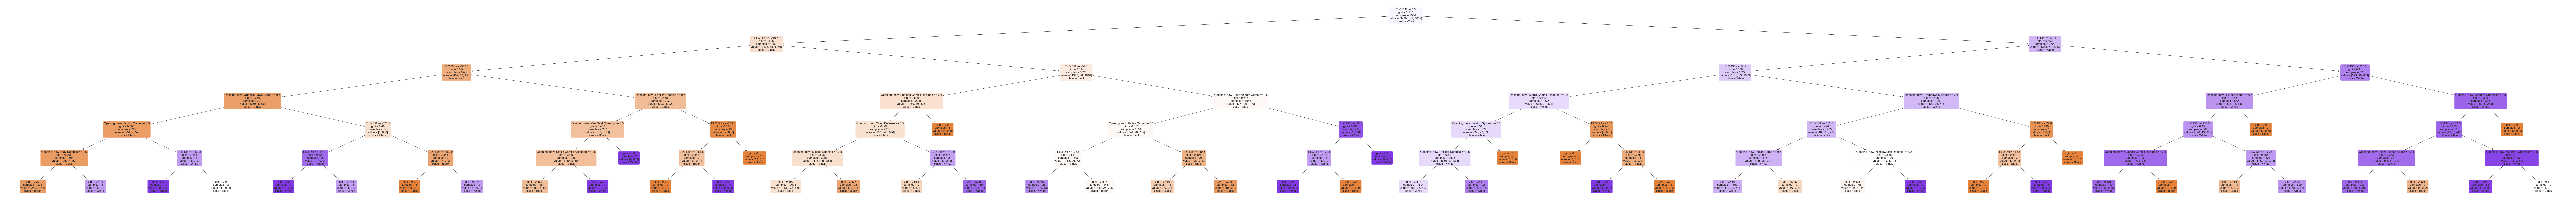

In [ ]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])